<a href="https://colab.research.google.com/github/tutr464b/Gradient-Descent/blob/main/polynomial_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We want to use Gradiant descent method the find global minimum for a polynomial degree 4, which has form $$V(x) = ax^4 + bx^2 + cx + d$$

I will take $a = 1$, $b = -3$, $c =1$ and $d = 3.514$ for a concrete example

for testing, I start at position $x_0=-1.75$
end take the $\alpha$ in the set { 0.001, 0.19, 0.1, 0.205}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def update(x, a, b, c, d, alpha):
  x = x - alpha*(4*x**3 + 2*b*x + c)

  return x

def V(x, a, b, c, d):
  return a*x**4 + b*x**2 + c*x + d

a = 1
b = -3
c = 1
d = 3.514

x0 = -1.75
iterations = 101
alphas = np.array([0.001, 0.19, 0.1, 0.205])

losses = np.empty(shape=(iterations, len(alphas)))
results = np.empty(len(alphas))

for j in range(len(alphas)):
  x = x0
  alpha = alphas[j]
  for i in range(iterations):
    losses[i, j] = V(x, a, b, c, d)
    if i != iterations - 1:
      x=update(x, a, b, c, d, alpha)
  results[j] = x

for j in range(len(alphas)):
  print(100*"-")
  print("Alpha: ", alphas[j])
  print("xmin: ", results[j])
  print("Loss: ", V(results[j], a, b, c, d))

----------------------------------------------------------------------------------------------------
Alpha:  0.001
xmin:  -1.376518421356889
Loss:  0.04335095929070443
----------------------------------------------------------------------------------------------------
Alpha:  0.19
xmin:  -0.8912145169689081
Loss:  0.8708497512243683
----------------------------------------------------------------------------------------------------
Alpha:  0.1
xmin:  -1.300839565941577
Loss:  9.496106521122982e-05
----------------------------------------------------------------------------------------------------
Alpha:  0.205
xmin:  1.1308872611718561
Loss:  2.443769819121824


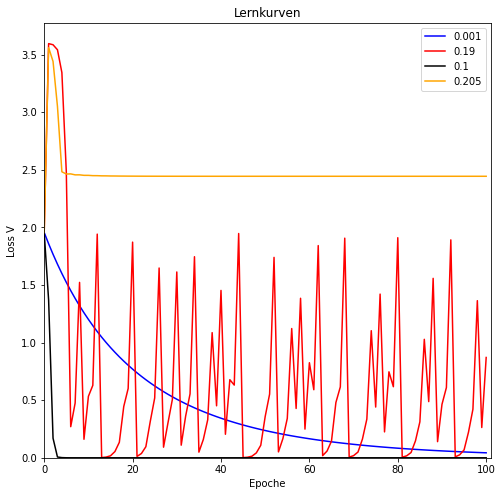

In [4]:
colors = {
    0.001: "blue",
    0.19: "red",
    0.1: "black",
    0.205: "orange"
}
plt.figure(figsize=(8, 8))
plt.title("Lernkurven")
plt.xlabel("Epoche")
plt.ylabel("Loss V")
plt.xlim(0, iterations)

for i in range(len(alphas)):
  alpha = alphas[i]
  plt.plot(range(iterations), losses[:, i], label=str(alpha), color=colors[alpha])

plt.legend()
plt.ylim(bottom=0)
plt.show()


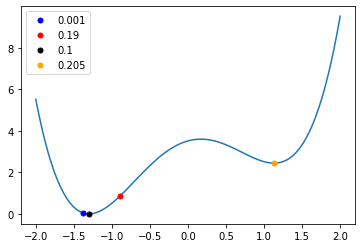

In [5]:
xs = np.linspace(-2, 2, 100)
ys = V(xs, a, b, c, d)

plt.plot(xs, ys)

for j in range(len(alphas)):
  alpha = alphas[j]
  xmin = results[j]
  vxmin = V(xmin, a, b, c, d)
  plt.plot(xmin, vxmin, marker='.', linestyle="None", label=str(alpha), color=colors[alpha], ms=10)
plt.legend()
plt.show()

the $\alpha$ = 0.001 gives the best result, however it takes too long to reach it

so it reality, the best $\alpha$ should be 0.1